<a href="https://colab.research.google.com/github/PorasS/AI/blob/master/MulticlassClassiROCAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Binary Classification: Classification between two possibilities, positive and negative.

>Classification: Classification between more than 2. The iris dataset (3-way) classification.

>Regression: Numeric prediction. How many mpg does a car have?


In [2]:
import pandas as pd
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv", na_values=['NA','?'])

display(df[0:5])

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**ROC Curve**
There are two types of error in binary classification, known as false positives and false negatives:

>False positive: your model identified that the patient had the disease, however the patient did not had the disease.

>False Negative: your model identified that the patient did not have the disease, however the patient did have the disease.

>True positive: your model correctly identified that the patient had the disease.

>True negative: your model correclty identified that the patient did not have the disease.

Types of Error:

> True vs False positives : Type 1 error, sensitivity of test

>True vs False Negatives: Type 2 error, specificity of test

Sensitivity: How good the model at predicting positives (True Positive Rate).

Sensitivity=true positives/(true positive+false negative)

Specificity: How good the model at predicting negatives (True negative rate)or (1-specificity))or(False Positive Rate).

Specificity = true negatives/(true negative+false positive)

Neural networks classify in terms of probability of it being positive. However, at what probability do you give a positive result? Is the cutoff 50%? 90%? Where you set this cutoff is called the threshold. Anything above the cutoff is positive, anything below is negative. Setting this cutoff allows the model to be more sensitive or specific:


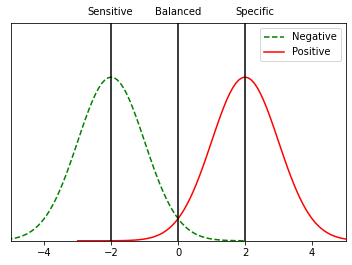

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu1 = -2
mu2 = 2
variance = 1
sigma = math.sqrt(variance)
x1 = np.linspace(mu1 - 5*sigma, mu1 + 4*sigma, 100)
x2 = np.linspace(mu2 - 5*sigma, mu2 + 4*sigma, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/1,color="green", 
         linestyle='dashed')
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/1,color="red")
plt.axvline(x=-2,color="black")
plt.axvline(x=0,color="black")
plt.axvline(x=+2,color="black")
plt.text(-2.7,0.55,"Sensitive")
plt.text(-0.7,0.55,"Balanced")
plt.text(1.7,0.55,"Specific")
plt.ylim([0,0.53])
plt.xlim([-5,5])
plt.legend(['Negative','Positive'])
plt.yticks([])
plt.show()


In [4]:
from scipy.stats import zscore

# prepare data - apply z-score to all columns
# only do this if you have no categoricals columns
x_columns = df.columns.drop('diagnosis').drop('id')

for col in x_columns:
  df[col] = zscore(df[col])

# Convert to numpy - Regression
x = df[x_columns].values
y = df['diagnosis'].map({'M':1,'B':0}) # Binary classification, M is 1 and B is 0


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

**ROC Chart Example**

In [11]:
# Classification Neural Network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1],activation='relu',kernel_initializer= 'random_normal'))
model.add(Dense(50 ,activation='relu',kernel_initializer = 'random_normal'))
model.add(Dense(25, activation='relu',kernel_initializer = 'random_normal'))
model.add(Dense(1, activation='linear',kernel_initializer = 'random_normal'))
model.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor])


14/14 [==============================] - 0s 14ms/step - loss: 1.4690 - accuracy: 0.6291 - val_loss: 0.8719 - val_accuracy: 0.6224


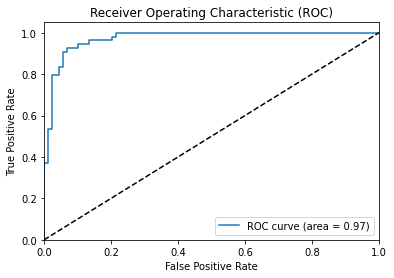

In [13]:
pred = model.predict(x_test)
plot_roc(pred,y_test)

**Multiclass Classification Error Metrics**